 <h1> TASK 1 - Classifiers

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve

<h2> Preliminary data analysis </h2>

In [2]:
#looking at the data
data = pd.read_csv("bioresponse.csv", header=0, sep=',')
data.tail(10)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
3741,0,0.066700,0.500446,0.15,0.0,0.134701,0.645594,0.256110,0.219558,0.729921,...,0,0,0,0,0,0,0,0,0,0
3742,0,0.200000,0.583884,0.05,0.0,0.138530,0.740136,0.170377,0.376302,0.797697,...,0,0,0,0,0,0,0,0,0,0
3743,0,0.133333,0.765646,0.15,0.0,0.354546,0.564943,0.220880,0.435728,0.487883,...,0,0,0,0,0,0,0,0,0,0
3744,0,0.033300,0.500483,0.00,0.0,0.390184,0.734103,0.236868,0.203155,0.802258,...,0,0,0,0,0,0,0,0,0,0
3745,1,0.066700,0.842546,0.00,0.0,0.305172,0.700507,0.284378,0.556145,0.725174,...,0,0,0,0,0,0,0,0,0,0
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0
3750,0,0.133333,0.533952,0.00,0.0,0.347966,0.757971,0.230667,0.272652,0.854116,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.shape

(3751, 1777)

<b> Splitting the data </b>

In [5]:
# separating predictors from the target
data_target = data.Activity.values
data = data.iloc[:, 1:]

In [6]:
data_train, data_test, target_train, target_test = train_test_split(data, data_target, test_size=0.25, random_state=292)

<h2> Desicion trees - training </h2>

<b>Small one</b>

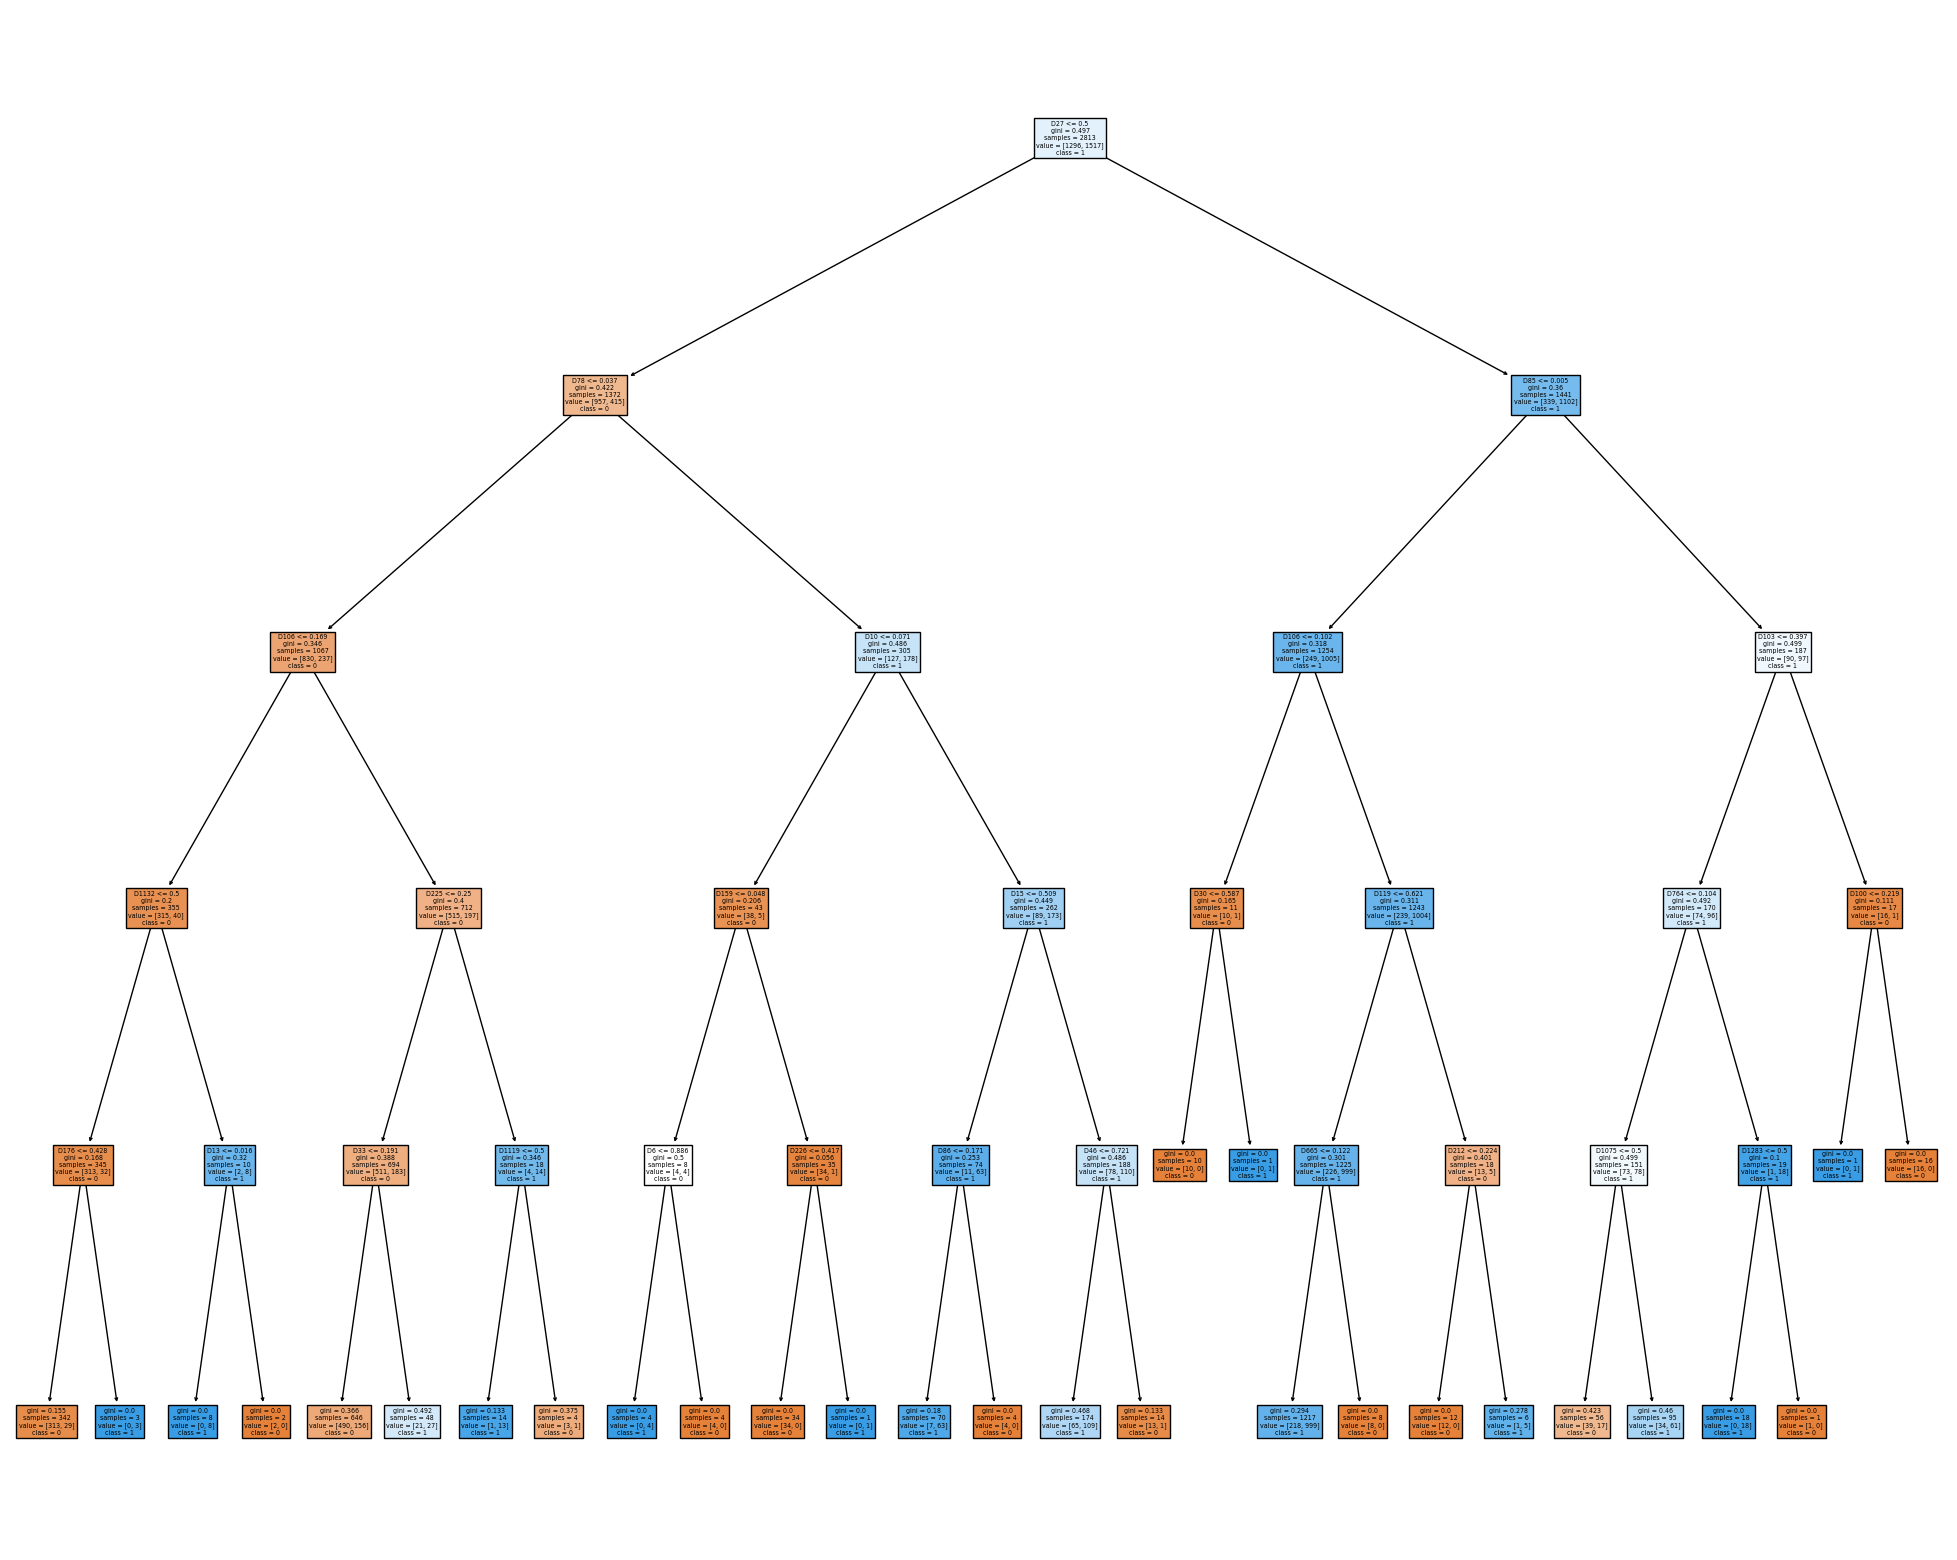

In [7]:
small_tree = DecisionTreeClassifier(max_depth=5)
small_tree.fit(data_train, target_train)

#plotting the small tree

fig = plt.figure(figsize=(25,20)) #i know you weren't asking for it - i wanted to try to plot the tree, it might be wrong) 
_ = tree.plot_tree(small_tree, 
                   feature_names=data_train.columns,  
                   class_names=['0','1'],
                   filled=True)

<b> Deep one

In [8]:
deep_tree = DecisionTreeClassifier(max_depth=45)
deep_tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=45)

<h2>Random forest

<b> On small trees

In [9]:
rf_small = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_small.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

<b> On deep trees

In [10]:
rf_deep = RandomForestClassifier(n_estimators=200, max_depth=45)
rf_deep.fit(data_train, target_train)

RandomForestClassifier(max_depth=45, n_estimators=200)

<h2> Metrics

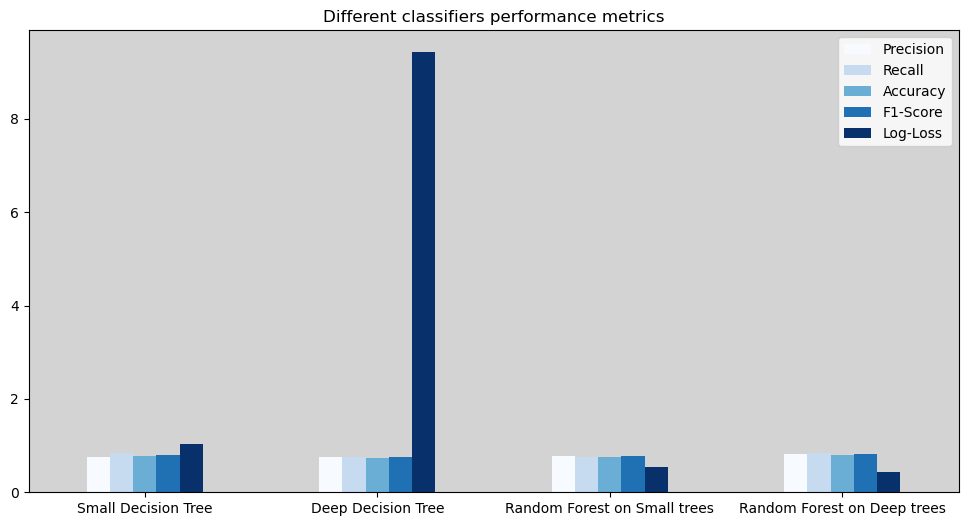

,Precision,Recall,Accuracy,F1-Score,Log-Loss
Small Decision Tree,0.761404,0.839458,0.766525,0.798528,1.030077
Deep Decision Tree,0.751445,0.754352,0.727079,0.752896,9.426471
Random Forest on Small trees,0.774510,0.764023,0.747335,0.769231,0.549896
Random Forest on Deep trees,0.816288,0.833656,0.804904,0.824880,0.441944


In [23]:
classifiers = ["Small Decision Tree", "Deep Decision Tree", "Random Forest on Small trees", "Random Forest on Deep trees"]
metrics = ["Precision", "Recall", "Accuracy", "F1-Score", "Log-Loss"]
results = []

for clf in [small_tree, deep_tree, rf_small, rf_deep]:
    target_pred = clf.predict(data_test)
    target_proba = clf.predict_proba(data_test)[:, 1]  
    
    precision = precision_score(target_test, target_pred)
    recall = recall_score(target_test, target_pred)
    accuracy = accuracy_score(target_test, target_pred)
    f1 = f1_score(target_test, target_pred)
    logloss = log_loss(target_test, target_proba)
    
    results.append([precision, recall, accuracy, f1, logloss])
    
results_df = pd.DataFrame(results, columns=metrics, index=classifiers)

#plotting the metrics

fig, ax = plt.subplots(figsize=(12, 6))
fig =results_df.plot(kind='bar',ax=ax,colormap='Blues')
ax=ax.set_facecolor('lightgray')
plt.title('Different classifiers performance metrics')
plt.xticks(rotation=0)
plt.show()

results_df

<h2> Precision-Recall and ROC curves

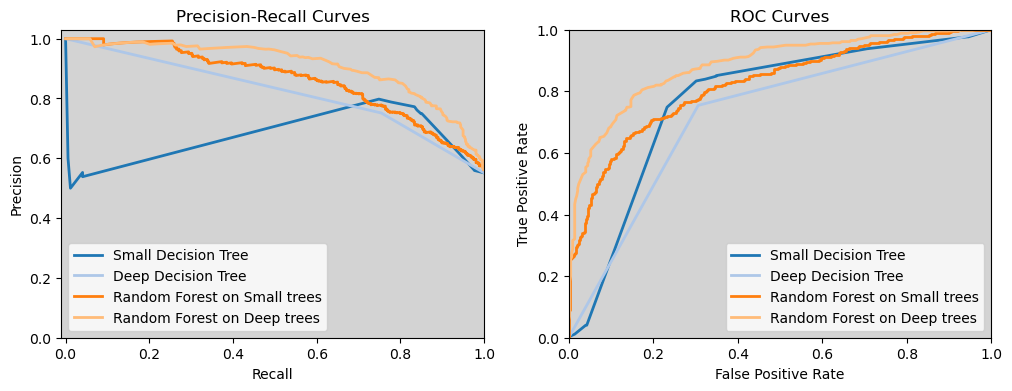

In [12]:
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78'] #fancy colors for the lines
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))


# precision-recall curve
for i, clf in enumerate([small_tree, deep_tree, rf_small, rf_deep]):
    target_scores = clf.predict_proba(data_test)[:, 1]
    precision, recall,_ = precision_recall_curve(target_test, target_scores)
    plt1.plot(recall, precision, color=colors[i], lw=2, label=f'{classifiers[i]}')

# making plots pretty - setting the asix, lables, title, legend, background color
plt1.set_title('Precision-Recall Curves')
plt1.set_xlabel('Recall')
plt1.set_ylabel('Precision')
plt1.set_xlim([-0.01, 1.0])
plt1.set_ylim([0.0, 1.03])
plt1.legend(loc="best")
plt1.set_facecolor('lightgray')

# roc curve
for i, clf in enumerate([small_tree, deep_tree, rf_small, rf_deep]):
    target_scores = clf.predict_proba(data_test)[:, 1]
    fpr, tpr,_ = roc_curve(target_test, target_scores)
    plt2.plot(fpr, tpr, color=colors[i], lw=2, label=f'{classifiers[i]}')

#grooming the other plot
plt2.set_title('ROC Curves')
plt2.set_xlabel('False Positive Rate')
plt2.set_ylabel('True Positive Rate')
plt2.legend(loc="best")
plt2.set_xlim([0.0, 1.0])
plt2.set_ylim([0.0, 1.0])
plt2.set_facecolor('lightgray')

plt.show()


<h2> The classifier that avoids Type II error

In [15]:
custom_tree = RandomForestClassifier(n_estimators=200)
custom_tree.fit(data_train, target_train)
target_pred_custom = custom_tree.predict(data_test)
target_proba_custom = custom_tree.predict_proba(data_test)[:, 1]  
target_pred_custom = target_proba_custom > 0.1 #setting the threshold so the recall is above 0.95

# calculate the same metrics for the custom tree
precision_custom = precision_score(target_test, target_pred_custom)
recall_custom = recall_score(target_test, target_pred_custom)
accuracy_custom = accuracy_score(target_test, target_pred_custom)
f1_custom = f1_score(target_test, target_pred_custom)
logloss_custom = log_loss(target_test, target_proba_custom)

# adding the metrics to the innitial dataset to compare
results_df.loc["Custom Decision Tree"] = [precision_custom, recall_custom, accuracy_custom, f1_custom, logloss_custom]

results_df 

,Precision,Recall,Accuracy,F1-Score,Log-Loss
Small Decision Tree,0.761404,0.839458,0.766525,0.798528,1.030077
Deep Decision Tree,0.751445,0.754352,0.727079,0.752896,9.426471
Random Forest on Small trees,0.774510,0.764023,0.747335,0.769231,0.549896
Random Forest on Deep trees,0.816288,0.833656,0.804904,0.824880,0.441944
Custom Decision Tree,0.578652,0.996132,0.598081,0.732054,0.443707
